# Regressieboom afstelling

### Importeren modules

In [1]:
# imports

# numerical tools
import numpy as np
import pandas as pd

# plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# machine learning tools
import sklearn
import pandas_ml as pdml

# notebook initialisation
%matplotlib inline

In [2]:
#uitlezen van csv in dataframe mbv pandas, 
#splitsen op ;, gebruik 0e rij als kolomnaam
df = pd.read_csv('data/dummydataset.csv',sep=';', header=0)

In [3]:
#tonen van het ingeladen dataframe (default 5 rijen)
df.head()

,totaalTijd,toespoor,camber,banden,bandendruk,hoogte,locatienaam,ondergrond,typeEvent,main,temperatuur,kortebeschrijving,luchtdruk,vochtigheid,temperatuur_min,temperatuur_max,windsnelheid,windrichting,bewolktheid
0,2.20,1004,-0.5,C17 slick,0.7,30,Genk,Droog,Acceleratie,Clear,20,clear sky,1020,50,24,27,2,20,0
1,2.16,1003,-0.5,C17 slick,0.7,30,Genk,Droog,Acceleratie,Clear,20,clear sky,1020,50,24,27,2,20,0
2,2.14,1002,-0.5,C17 slick,0.7,30,Genk,Droog,Acceleratie,Clear,20,clear sky,1020,50,24,27,2,20,0
3,2.09,1001,-0.5,C17 slick,0.7,30,Genk,Droog,Acceleratie,Clear,20,clear sky,1020,50,24,27,2,20,0
4,2.10,1000,-0.5,C17 slick,0.7,30,Genk,Droog,Acceleratie,Clear,20,clear sky,1020,50,24,27,2,20,0


### Preprocessing
String data is voor mensen zeer leesbaar, computer is hier niets mee, daarom encoderen naar ordinale waarden

In [4]:
#Vervangen van:
#1) C17 slick / C17 wet --> 1 / 2
df['banden'][df['banden'] == 'C17 slick'] = 1
df['banden'][df['banden'] == 'C17 wet'] = 2
#2) Genk --> 1
df['locatienaam'][df['locatienaam'] == 'Genk'] = 1
#3) Droog / Nat --> 1 / 2
df['ondergrond'][df['ondergrond'] == 'Droog'] = 1
df['ondergrond'][df['ondergrond'] == 'Nat'] = 2
#4) Acceleratie / SkidPad --> 1 / 2
df['typeEvent'][df['typeEvent'] == 'Acceleratie'] = 1
df['typeEvent'][df['typeEvent'] == 'SkidPad'] = 2
#5) Clear / Rain --> 1 / 2
df['main'][df['main'] == 'Clear'] = 1
df['main'][df['main'] == 'Rain'] = 2
#6) clear sky / light rain --> 1 / 2
df['kortebeschrijving'][df['kortebeschrijving'] == 'clear sky'] = 1
df['kortebeschrijving'][df['kortebeschrijving'] == 'light rain'] = 2

df = df.infer_objects()
#df.head(400)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ip

### Verwijderen van lege kolommen

In [5]:
df = df.dropna()

### Scaling
Omdat waardes van toespoor en luchtdruk nogal hoog zijn dan 
rest dataset herschalen, zo makkelijker visualiseren.

In [6]:
df.toespoor_orig = df['toespoor'].copy()
df.luchtdruk_orig = df['luchtdruk'].copy()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [7]:
df['toespoor'] = (df['toespoor'] - df['toespoor'].min())/(df['toespoor'].max() - df['toespoor'].min())*10
df['luchtdruk'] = (df['luchtdruk'] - df['luchtdruk'].min())/(df['luchtdruk'].max() - df['luchtdruk'].min())*10

### In Pandas-ML

In [8]:
df_car = pdml.ModelFrame(df.copy(), target='totaalTijd')
df_car['toespoor'] = df.toespoor_orig    ## herstel toespoor
df_car['luchtdruk'] = df.luchtdruk_orig  ## herstel luchtdruk
df_car.head()

,totaalTijd,toespoor,camber,banden,bandendruk,hoogte,locatienaam,ondergrond,typeEvent,main,temperatuur,kortebeschrijving,luchtdruk,vochtigheid,temperatuur_min,temperatuur_max,windsnelheid,windrichting,bewolktheid
0,2.20,1004,-0.5,1,0.7,30,1,1,1,1,20,1,1020,50,24,27,2,20,0
1,2.16,1003,-0.5,1,0.7,30,1,1,1,1,20,1,1020,50,24,27,2,20,0
2,2.14,1002,-0.5,1,0.7,30,1,1,1,1,20,1,1020,50,24,27,2,20,0
3,2.09,1001,-0.5,1,0.7,30,1,1,1,1,20,1,1020,50,24,27,2,20,0
4,2.10,1000,-0.5,1,0.7,30,1,1,1,1,20,1,1020,50,24,27,2,20,0


### Statistische analyse

In [9]:
df_stats = pd.DataFrame(columns=df.columns)
df_stats.loc['aantal'] = df.count()
df_stats.loc['gemiddelde'] = df.mean()
df_stats.loc['standaarddeviatie'] = df.var()
df_stats.loc['minimum'] = df.min()
df_stats.loc['maximum'] = df.max()
df_stats.loc['1ste kwartiel'] = df.quantile(0.25)
df_stats.loc['2de kwartiel'] = df.quantile(0.50)
df_stats.loc['3de kwartiel'] = df.quantile(0.75)
df_stats.loc['skew'] = df.skew()
df_stats.loc['kurtosis'] = df.kurtosis()
df_stats

,totaalTijd,toespoor,camber,banden,bandendruk,hoogte,locatienaam,ondergrond,typeEvent,main,temperatuur,kortebeschrijving,luchtdruk,vochtigheid,temperatuur_min,temperatuur_max,windsnelheid,windrichting,bewolktheid
aantal,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432
gemiddelde,3.65634,5,-0.25,1.5,0.7,35,1,1.5,1.5,1.5,18.5,1.5,5,71.5,20.5,22.5,3,125,37.5
standaarddeviatie,2.17706,10.4408,0.062645,0.25058,0.00668213,25.058,0,0.25058,0.25058,0.25058,2.25522,0.25058,25.058,463.323,12.2784,20.297,1.00232,11050.6,1409.51
minimum,2.06,0,-0.5,1,0.6,30,1,1,1,1,17,1,0,50,17,18,2,20,0
maximum,5.24,10,0,2,0.8,40,1,2,2,2,20,2,10,93,24,27,4,230,75
1ste kwartiel,2.19,2.5,-0.5,1,0.6,30,1,1,1,1,17,1,0,50,17,18,2,20,0
2de kwartiel,3.66,5,-0.25,1.5,0.7,35,1,1.5,1.5,1.5,18.5,1.5,5,71.5,20.5,22.5,3,125,37.5
3de kwartiel,5.13,7.5,0,2,0.8,40,1,2,2,2,20,2,10,93,24,27,4,230,75
skew,6.42971e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
kurtosis,-2.00362,-1.23034,-2.00932,-2.00932,-1.50349,-2.00932,0,-2.00932,-2.00932,-2.00932,-2.00932,-2.00932,-2.00932,-2.00932,-2.00932,-2.00932,-2.00932,-2.00932,-2.00932


Welk(e) van deze kolommen heeft/hebben het grootste aantal *outliers* (waarden die meer dan 2.5 keer de standaarddeviatie verwijderd zijn van het steekproefgemiddelde)?

In [10]:
print(df[(df<=df.mean()-2.5*df.std()) | (df>=df.mean()+2.5*df.std())].count())
print("Geen van de kolommen heeft outliers, behalve locatienaam. Dit omwille dat er maar één locatienaam voorkomt")

totaalTijd             0
toespoor               0
camber                 0
banden                 0
bandendruk             0
hoogte                 0
locatienaam          432
ondergrond             0
typeEvent              0
main                   0
temperatuur            0
kortebeschrijving      0
luchtdruk              0
vochtigheid            0
temperatuur_min        0
temperatuur_max        0
windsnelheid           0
windrichting           0
bewolktheid            0
dtype: int64
Geen van de kolommen heeft outliers, behalve locatienaam. Dit omwille dat er maar één locatienaam voorkomt


### Visualisatie

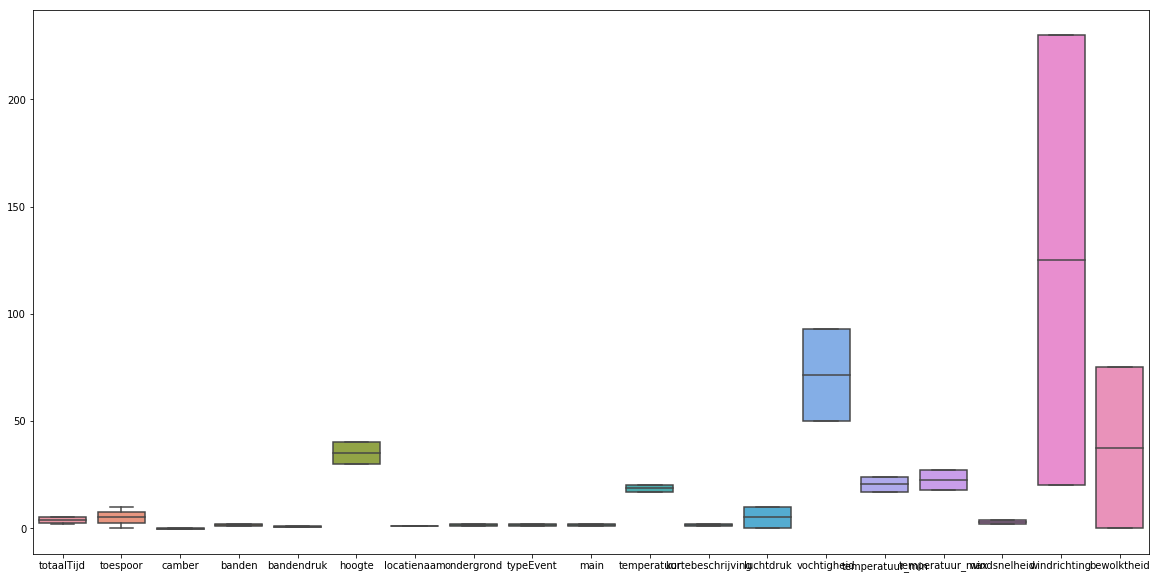

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=df, ax=ax)

In [12]:
#sns.pairplot(data=df, hue="totaalTijd", vars=["color_hue", "color_intensity"])

In [13]:
#Scaling
scaler = df_car.preprocessing.MinMaxScaler()
df_car = df_car.fit_transform(scaler)
scaler = df_car.fit(scaler)

### Modelling
#### Gebruikmakende van Pandas-ML

In [26]:
pca = df_car.decomposition.PCA(n_components=2)
df_car_transformed = df_car.fit_transform(pca)
df_car_transformed.head()

,totaalTijd,0,1
0,2.20,1.732051,0.5
1,2.16,1.732051,0.5
2,2.14,1.732051,0.5
3,2.09,1.732051,0.5
4,2.10,1.732051,0.5


In [15]:
#sns.pairplot(df_car_transformed, x_vars=0, y_vars=1, hue='totaalTijd', kind='scatter')


### Train-test split

In [16]:
train_car, test_car = df_car_transformed.model_selection.train_test_split(train_size=0.7, test_size=0.3)

### Regressie boom

In [17]:
clf_tree = train_car.tree.DecisionTreeRegressor()
train_car.fit(clf_tree)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [18]:
from sklearn import tree
tree_fig = train_car.tree.export_graphviz(clf_tree, out_file=None)
graph = graphviz.Source(tree_fig)

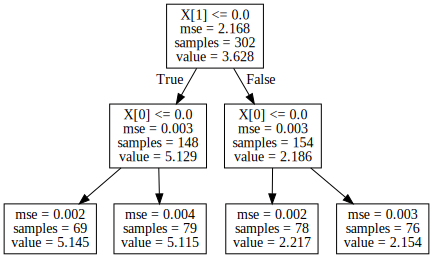

In [19]:
graph

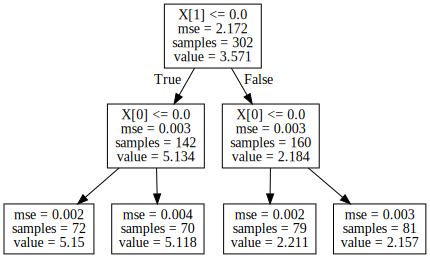

In [20]:
#scaling 
df_car = df_car.inverse_transform(scaler)
pca = df_car.decomposition.PCA(n_components=2)
df_car_transformed = df_car.fit_transform(pca)
#learning
train_car, test_car = df_car_transformed.model_selection.train_test_split(train_size=0.7, test_size=0.3)
#genereer
clf_tree2 = train_car.tree.DecisionTreeRegressor()
train_car.fit(clf_tree2)
#teken
fig = train_car.tree.export_graphviz(clf_tree2, out_file=None)
graph = graphviz.Source(fig)
graph

### Support Vector Machine

In [21]:
from sklearn import svm
clf_svm = train_car.svm.LinearSVR()
train_car.fit(clf_svm)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

### Multilayer perceptron

In [22]:
from sklearn.neural_network import MLPRegressor
clf_mlp = MLPRegressor(hidden_layer_sizes=(20,15,10,5), solver="lbfgs", max_iter=20000)
train_car.fit(clf_mlp)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 15, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [23]:
aantal_weights = 0
for i in range (0,len(clf_mlp.coefs_)):
    aantal_weights += len(clf_mlp.coefs_[i])
    print("layer",i,"heeft",len(clf_mlp.coefs_[i]),"weights")
print("totaal aantal weights",aantal_weights)

layer 0 heeft 2 weights
layer 1 heeft 20 weights
layer 2 heeft 15 weights
layer 3 heeft 10 weights
layer 4 heeft 5 weights
totaal aantal weights 52


### Cross-Validatie

In [24]:
# ShuffleSplit
from sklearn.model_selection import ShuffleSplit
cv = train_car.model_selection.ShuffleSplit(n_splits=10, test_size=0.3)

In [25]:
# cross validatie score
#data.values
from sklearn.model_selection import cross_val_score
tree_score = train_car.model_selection.cross_val_score(clf_tree,cv=cv)
svm_score = train_car.model_selection.cross_val_score(clf_svm,cv=cv)
mlp_score = train_car.model_selection.cross_val_score(clf_mlp,cv=cv)

print("gem. tree_score", (sum(tree_score)/len(tree_score))*100 )
print("gem. svm_score", (sum(svm_score)/len(svm_score))*100 )
print("gem. mlp_score", (sum(mlp_score)/len(mlp_score))*100 )

gem. tree_score 99.88454618671429
gem. svm_score 99.87233144943852
gem. mlp_score 99.87537244661603


### Prediction 